# Complexite d'algorithmes: recherche, tris, rendu de monnaie

# Générer un tableau aléatoirement:

In [1]:
from random import randint, sample
          
#si on veut juste générer un flux de nombres aléatoires:
for a in sample(range(1, 10000), 10):
    print(a)
    
# Pour générer un tableau de 10 nombres entre 1 et 10000:
# On peut aussi utiliser numpy pour pouvoir traiter de grands tableaux
# plus efficacement 
# from numpy.random import *
tab = [randint(1, 10000) for i in range(10)]
tab

4140
2441
6783
908
659
3963
5588
154
8431
7769


[7571, 3173, 6700, 1480, 3961, 5298, 529, 9214, 2110, 4952]

## Cacul de l'indice du minimum d'un tableau

In [4]:
def indice_min(tab):
    res = 0
    for i in range(1,len(tab)):
        if tab[i] < tab[res]:
            res = i
    return res 

### Prenons un gros tableau:

In [14]:
tab = [randint(1, 10000) for i in range(10000)]
len(tab)

10000

In [15]:
liste = [1,2,3]
print(id(liste[0]))
print(id(liste[1]))
id(liste[2])

4436155856
4436155888


4436155920

### chronométons le temps de calcul d'un indice min

In [17]:
import gc
from time import perf_counter_ns as now

def tempo(taille):
    t = [randint(1, 1000) for i in range(taille)]
    t0 = now()
    indice_min(t)
    return (now()-t0)*1000

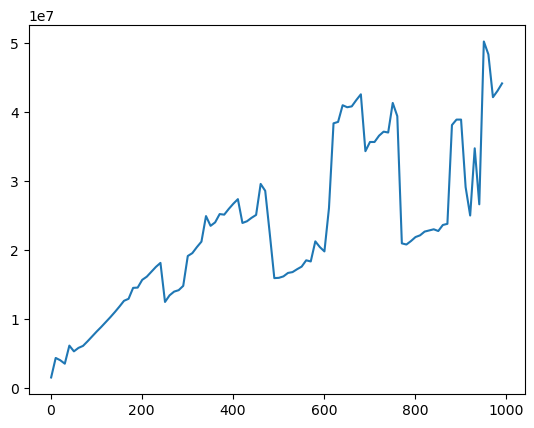

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import vectorize, arange
vfunc = vectorize(tempo)
x = arange(1, 1000, 10)
y = vfunc(x)
plt.plot(x, y)
plt.show()

##### Ces résultats semblent un peu cahotiques ... On peut lisser un peu plus les résultats et comparer à la fonction de référence f(n) = n car complexité en  O(n)

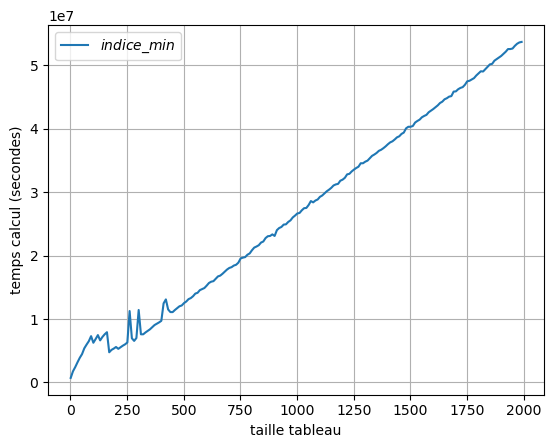

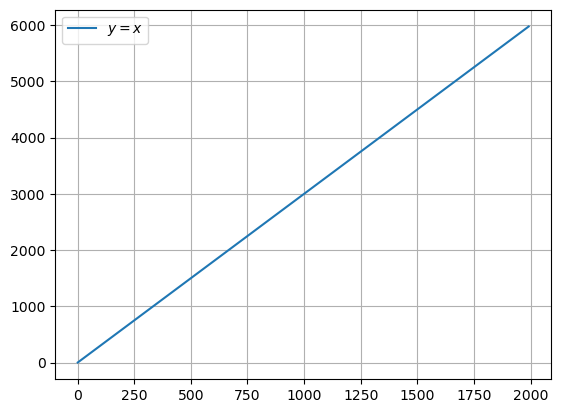

In [7]:
x = arange(1, 2000, 10)
# lissage par le min
y = [ min([tempo(w) for i in range(10)]) for w in x]
plt.figure(1)
ax=plt.gca()
plt.plot(x, y,label=r'$indice\_min$')
plt.legend()
plt.grid(True)
plt.figure(2)
plt.plot(x,3*x,label=r'$y=x$')
plt.legend()
plt.grid(True)
ax.set_xlabel('taille tableau')
ax.set_ylabel('temps calcul (secondes)')
plt.show()

##### Ces deux courbes se ressemblent bien mais elles ont des échelles très différentes. 

## Algos de recherche :

### Recherche simple :

In [8]:
def recherche(t,x):
    """
     renvoie le premier indice où se trouve la valeur de x dans t
     -1 sinon
    """
    i = 0
    while i < len(t) and t[i] != x:
        i = i+1
    if i == len(t):
        i = -1 # pas trouvé
    return i

In [21]:
import gc
from time import perf_counter_ns as now

def tempo2(taille):
    t = [randint(1, 1000) for i in range(taille)]
    e = randint(1,1000)
    gc.disable() # pas très utile, on désactive le garbage collector le temps de chronométrer
    t0 = now()
    recherche(t,e)
    gc.enable() # on réactive gc
    return (now() - t0)

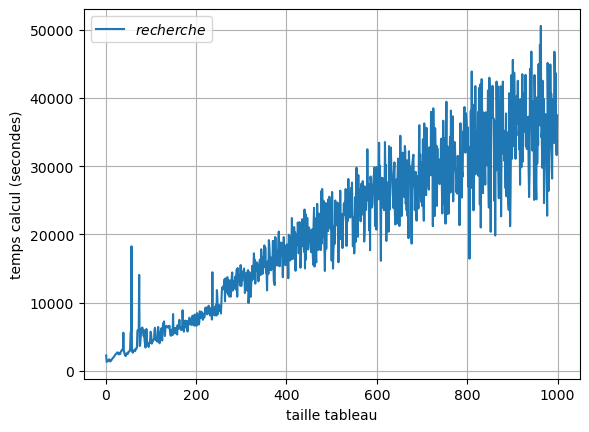

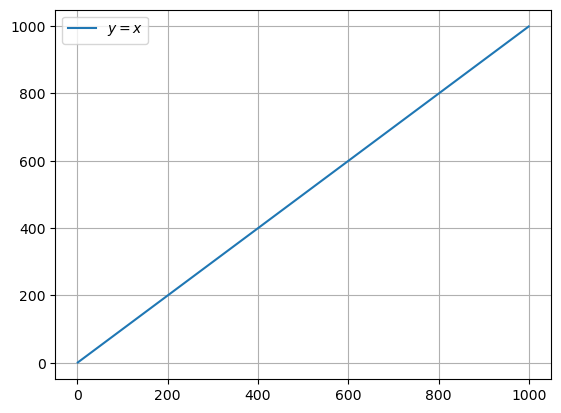

In [24]:
from statistics import mean, median
import matplotlib.pyplot as plt

x = arange(1, 1000, 1)
# on peut essayer des
# lissages par la médiane, la moyenne, le max, min, etc.
y = [ mean([tempo2(w) for i in range(10)]) for w in x]
plt.figure(1)
ax = plt.gca()
plt.plot(x, y,label=r'$recherche$')
plt.legend()
plt.grid(True)
plt.figure(2)
plt.plot(x,x,label=r'$y=x$')
plt.legend()
plt.grid(True)
ax.set_xlabel('taille tableau')
ax.set_ylabel('temps calcul (secondes)')
plt.show()

### Recherche dichotomique :

In [25]:
def rech_dicho(t,x):
    a, b = 0, len(t)
    milieu = (a+b)//2
    while a < b and x != t[milieu]:
        milieu = (a+b)//2
        if t[milieu] < x:
            a = milieu+1
        else:
            b = milieu  # x est avant ou est trouvé
    if  len(t) <= milieu or t[milieu] != x:  # pas trouvé
        milieu = -1
    return milieu

In [26]:
t = sorted([randint(1, 1000) for i in range(100)])
e = t[randint(1,100)]
print(t)
print(e)
print(rech_dicho(t,e))

[15, 16, 26, 70, 71, 80, 81, 96, 97, 98, 101, 115, 120, 123, 127, 127, 132, 143, 146, 157, 158, 178, 179, 179, 198, 214, 242, 243, 245, 254, 259, 260, 278, 278, 279, 279, 289, 293, 300, 301, 309, 316, 349, 361, 368, 402, 414, 415, 431, 471, 480, 512, 519, 526, 532, 554, 555, 565, 581, 583, 614, 628, 631, 646, 650, 672, 674, 684, 688, 688, 720, 726, 728, 741, 747, 752, 765, 769, 772, 795, 804, 806, 828, 842, 844, 857, 871, 878, 884, 887, 890, 904, 911, 923, 939, 957, 961, 972, 974, 979]
842
83


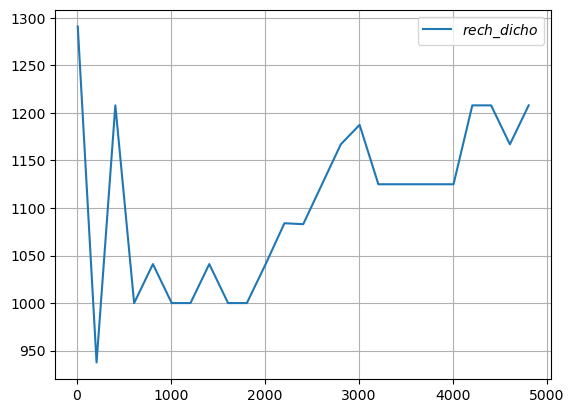

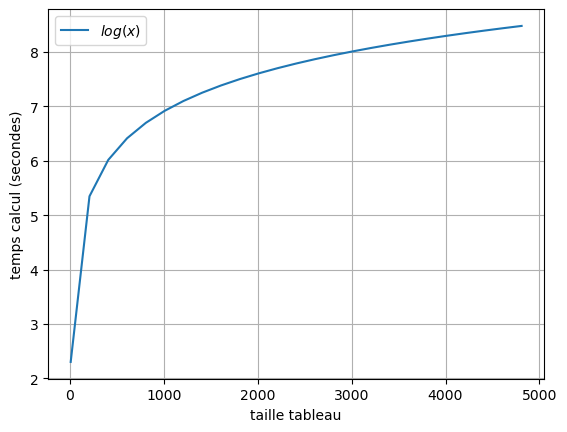

In [33]:
from math import log
import numpy as np
def tempo3(taille):
    t = sorted([randint(1, 500) for i in range(taille)])
    e = randint(1,1000)
    gc.disable()
    t0 = now()
    rech_dicho(t,e)
    gc.enable()
    return (now() - t0)

# Calcul assez long
x = arange(10, 5000, 200)
# lissage par la mediane, pas parfait ...
y = [ median([tempo3(w) for i in range(100)]) for w in x]
plt.figure(1)
plt.plot(x, y,label=r'$rech\_dicho$')
plt.legend()
plt.grid(True)
plt.figure(2)
plt.plot(x,np.log(x),label=r'$log(x)$')
plt.legend()
plt.grid(True)
ax = plt.gca()
ax.set_xlabel('taille tableau')
ax.set_ylabel('temps calcul (secondes)')
plt.show()

## Tris

### Calculs avec timeit.Timer et affichages

### Tri simple par selection :

In [18]:
def tri_selection(t):
    n = len(t)
    for i in range(n):
        indice_min = i
        for j in range(i+1,n):
            if t[indice_min] > t[j]:
                indice_min = j
        t[i], t[indice_min] = t[indice_min], t[i]

In [19]:
# echange des contenus des cases i et j dans t
def swap(t,i,j):
    t[i],t[j] = t[j], t[i]
    
def tri_selection(t):
    for i in range(len(t)-1):
        mini = i
        for j in range(i+1,len(t)):
            if t[j] < t[mini]: 
                mini = j
        swap(t,i,mini)
    return t

In [20]:
tri_selection([17,2,8, 45, -54,12])

[-54, 2, 8, 12, 17, 45]

### Preuve de correction : Tri par insertion

Montrons que la propriété ``t[:i] == sorted(t)[:i]`` et ``t est une permutation de l'entrée initiale`` est un invariant de boucle. 
Cette propriété est trivialement vraie en entrant dans le premier tour de boucle, puisque la tranche ``t[0:0]`` est vide et que ``t`` est toujours une permutation du tableau initial (puisqu'il n'a pas encore été modifié). 

Supposons qu'elle soit vraie au début du $i$ième tour, avec $0 \leq i < n$. Alors, après la seconde boucle ``for``, ``mini`` contient l'indice d'un plus petit élément de la tranche ``t[i:]``. 
Or, on a ``t[:i] = = sorted(t)[:i]``, donc ``t[mini] >= t[k]`` pour tout $0 \leq k < i$ et ``t[indice_min] <= t[k]`` pour tout $i \leq k < n$.
Ainsi, ``sorted(t)[i] = t[mini]``, et après avoir exécuté le swap, on a ``t[:i+1] = sorted(t)[:i+1]`` et ``t`` est une permutation du tableau initial. Ainsi, on a bien montré que la propriété est un invariant de boucle.

Au total, à la fin de l'exécution de ``tri_selection``, ``t`` est une permutation du tableau initial et ``t[0:n] == t == sorted(t)``.
Ce qui montre la correction de la fonction.

### Tri à bulles :

In [21]:
def tri_bulles(t):
    for i in range(len(t)):
        for j in reversed(range(i,len(t))):
            if t[j] < t[j-1]:
                swap(t,j-1,j)
    return t

### Tri par insertion :

In [22]:
# insertion de t[n] en opérant des décalages
# à partir de la fin du tableau
def insere(t,n):
    i,aux = n,t[n]
    while t[i-1] > aux and i > 0:
        t[i] = t[i-1]
        i = i-1
    t[i] = aux
    
def tri_insere(t):
    for i in range(1,len(t)):
        insere(t,i)
    return t

        
# ou recursivement
def tri_insere_rec(t,n):
    if n>0 :
        tri_insere_rec(t,n-1)
        insere(t,n)

#### Essai :

In [23]:
t = [randint(1, 1000) for i in range(100)]
tri_insere(t)
print(t)
tri_insere_rec(t,99)
print(t)

[4, 8, 9, 10, 13, 26, 51, 56, 63, 64, 73, 88, 99, 105, 109, 132, 134, 145, 146, 176, 178, 182, 183, 187, 191, 193, 204, 220, 263, 267, 267, 269, 271, 291, 321, 330, 339, 341, 346, 350, 372, 377, 398, 408, 408, 410, 431, 452, 491, 499, 502, 507, 509, 520, 521, 540, 544, 547, 559, 564, 565, 567, 570, 589, 596, 604, 615, 620, 625, 625, 629, 631, 644, 660, 666, 677, 712, 714, 716, 724, 733, 739, 745, 781, 789, 793, 796, 820, 824, 826, 864, 868, 869, 901, 927, 966, 979, 980, 981, 983]
[4, 8, 9, 10, 13, 26, 51, 56, 63, 64, 73, 88, 99, 105, 109, 132, 134, 145, 146, 176, 178, 182, 183, 187, 191, 193, 204, 220, 263, 267, 267, 269, 271, 291, 321, 330, 339, 341, 346, 350, 372, 377, 398, 408, 408, 410, 431, 452, 491, 499, 502, 507, 509, 520, 521, 540, 544, 547, 559, 564, 565, 567, 570, 589, 596, 604, 615, 620, 625, 625, 629, 631, 644, 660, 666, 677, 712, 714, 716, 724, 733, 739, 745, 781, 789, 793, 796, 820, 824, 826, 864, 868, 869, 901, 927, 966, 979, 980, 981, 983]


### QuickSort :

In [24]:
#O(nlog(n)) en moyenne et O(n^2) au pire des cas
def qsort(liste):
    if liste == []:
        return []
    pivot = liste[0]
    low = qsort([x for x in liste[1:] if x < pivot])
    up = qsort([x for x in liste[1:] if x >= pivot])
    return low + [pivot] + up

In [10]:
t = [randint(1, 1000) for i in range(100)]
print(qsort(t))

[6, 12, 26, 34, 47, 50, 56, 57, 83, 89, 106, 108, 124, 133, 178, 197, 200, 202, 227, 231, 237, 242, 246, 280, 294, 298, 314, 321, 333, 333, 350, 357, 361, 379, 389, 409, 410, 424, 429, 431, 435, 455, 464, 473, 476, 494, 516, 518, 531, 534, 539, 542, 547, 560, 574, 581, 584, 592, 603, 613, 621, 621, 629, 630, 636, 657, 668, 672, 676, 682, 685, 727, 728, 731, 731, 772, 799, 813, 831, 848, 857, 858, 863, 865, 874, 875, 882, 889, 906, 907, 913, 937, 949, 953, 959, 969, 977, 983, 989, 998]


In [25]:
def fusion(t1, t2):
    """
     Fusion de 2 tableaux déjà triés
     On parcours les 2 tableaux en retenant le plus petit des éléments
     des 2 tableaux tant qu'il reste des élts dans t1 ou dans t2
     puis on complète avec ce qu'il reste de l'autre tableau
     Complexité :O(nlog(n))
    """
    t = []
    i = j = 0
    while i < len(t1) and j < len(t2):
        if t1[i] < t2[j]:
            t.append(t1[i])
            i += 1
        else:
            t.append(t2[j])
            j += 1
    # une des deux listes t1 ou t2 est consommée
    if t1:
        t.extend(t1[i:])
    if t2:
        t.extend(t2[j:])
    return t

def tri_fusion(t):
    if len(t) <= 1:
        return t
    else:
        return fusion( tri_fusion(t[:len(t)//2]), tri_fusion(t[len(t)//2:]))

In [26]:
def entasse(arr, n, i):
    """
    Ajoute un élément à un tax max en maintenant la propriété que
    chaque noeud parent doit être supérieur ou égal à ses enfants.
    Le fg de i est stocké dans le tableau en position 2i+a et le fd en 2i+2
    """
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        entasse(arr, n, largest)

def tri_par_tas(arr):
    n = len(arr)

    # Construire un tas maximal
    for i in range(n // 2 - 1, -1, -1):
        entasse(arr, n, i)

    # Un par un, extraire un élément du tas et reconstruire le tas
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        entasse(arr, i, 0)

# Exemple d'utilisation
arr = [12, 11, 13, 5, 6, 7]
tri_par_tas(arr)
print("Le tableau trié est:", arr)

Le tableau trié est: [5, 6, 7, 11, 12, 13]


In [27]:
def tri_standard_python(t):
    """
        Implémenté par le tri hybride Timsort. Cf https://en.wikipedia.org/wiki/Timsort
    """
    return sorted(t)

In [28]:
from random import randint, shuffle

def genere_liste(n):
    """génère une liste de n éléments compris entre 0 et 500"""
    return [randint(0,500) for _ in range (n)]

def test_algo(algo, liste_a_trier):
    """ entrée: un algorithme de tri et une liste à trier
        sortie: application de l'algo sur la liste"""
    shuffle(liste_a_trier) # mélange la liste
    liste_nombres = list(liste_a_trier) # copie de la liste
    algo(liste_nombres) #tri de la liste avec l'algo spécifié

In [29]:
import timeit, functools
# Calcul  long (au moins 5 mn) 
fonctions = [tri_selection, qsort, tri_insere, tri_bulles, tri_fusion,tri_par_tas, tri_standard_python]
taille_n = list(range(0, 7500, 500))
times_n = {f.__name__: [] for f in fonctions}

for n in taille_n:
    liste_nombres = genere_liste(n)
    for f in fonctions:
        times_n[f.__name__].append(min(timeit.Timer(functools.partial(test_algo, f,liste_nombres))
                    .repeat(repeat=3, number=5)))

In [30]:
str(tri_selection.__name__)

'tri_selection'

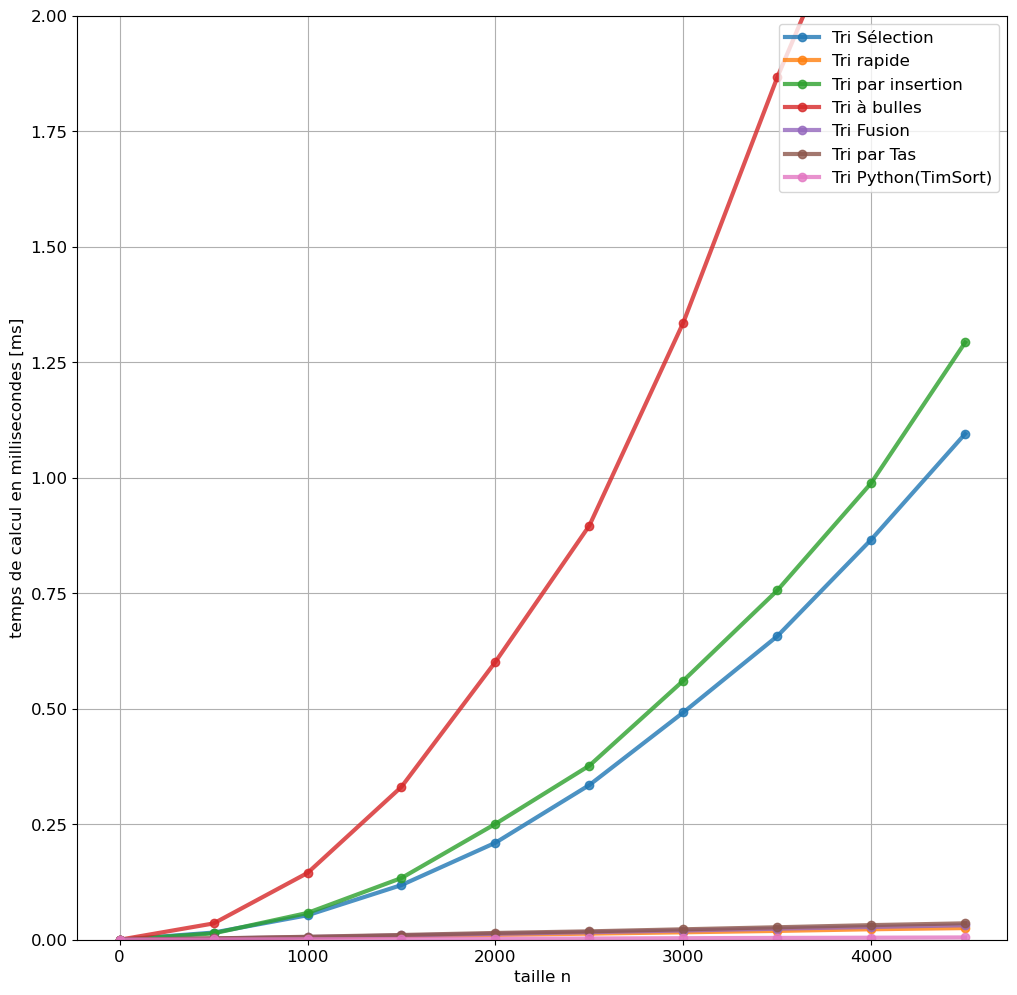

In [57]:
import matplotlib.pyplot as plt

def plot_timing():
    labels = [('tri_selection', 'Tri Sélection'), 
              ('qsort', 'Tri rapide'),
              ('tri_insere', 'Tri par insertion'),
              ('tri_bulles', 'Tri à bulles'),
              ('tri_fusion', 'Tri Fusion'),
              ('tri_par_tas', 'Tri par Tas'),
              ('tri_standard_python', 'Tri Python(TimSort)')
             ]

    plt.rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(12, 12))
    for lb in labels:
        plt.plot(taille_n, times_n[lb[0]], 
             alpha=0.8, label=lb[1], marker='o', lw=3)
    plt.xlabel('taille n')
    plt.ylabel('temps de calcul en millisecondes [ms]')
    plt.legend(loc='upper right')
    plt.ylim([0, 2])
    plt.grid()
    plt.show()
plot_timing()

### Borne inférieure de complexité pour les tris par comparaisons

Soit un algorithme $A$ de tri par comparaisons.
On peut considérer l'arbre binaire des comparaisons pour une entrée à $n$ éléments qu'il faut trier.
Il y a $n!$ permutations distinctes qu'il faut pouvoir discriminer par l'algo $A$.

Si $F$ est l'ensemble des feuilles de l'arbre, on doit donc avoir $$|F| > n!$$
Si on note $N$ l'ensemble de **tous** noeuds de l'arbre et $h$ sa hauteur, on a les relations :
$$ |F| = |N| + 1 \qquad \text{et} \qquad |N| < 2^h $$
(Les noeuds internes vérifient $∣N_{\text{int}}∣ = ∣N∣ − ∣F∣$ dans un arbre binaire complet)
On a donc :
$$ n! - 1 < 2^h $$
ce qui équivaut à $$ \log_2{(n! -1)} < h $$

Or on a  :

$$ \log{n!} = \Sigma_{k=1}^{n} \log k $$

et la propriété suivante :

$$ \frac{n}{2} \log{(\frac{n}{2})} \leq \Sigma_{k=1}^{n} n \log{n} \leq n \log{n} $$ (inégalité gauche car la moitié des termes sont supérieurs à $\log{(\frac{n}{2})}$ et inégalité droite obtenue par majoration par $n$ fois le max) :


d'où :$$ \Sigma_{k=1}^{n} \log k = \Theta( n \log{n} )$$ (meilleure complexité asymptotique possible)

\begin{align*}
n! &\sim \sqrt{2\pi n} \left( \frac{n}{e} \right)^n \\
h &\geq \log_2{(n! - 1)} \\
&\geq \log_2{(\sqrt{2\pi n} \left( \frac{n}{e} \right)^n - 1)} \\
&\geq \log_2{\left( \left( \frac{n}{e} \right)^n \right)} \\
&= n \log_2{\left( \frac{n}{e} \right)} \\
&= n (\log_2{n} - \log_2{e}) \dots \\
\end{align*}

In [58]:
from IPython.display import Latex

In [60]:
%%latex
Ou bien avec la formule de Stirling :

\begin{align*}
n! &\sim \sqrt{2\pi n} \left( \frac{n}{e} \right)^n \\
h &\geq \log_2{(n! - 1)} \\
&\geq \log_2{(\sqrt{2\pi n} \left( \frac{n}{e} \right)^n - 1)} \\
&\geq \log_2{\left( \left( \frac{n}{e} \right)^n \right)} \\
&= n \log_2{\left( \frac{n}{e} \right)} \\
&= n (\log_2{n} - \log_2{e}) \dots \\
\end{align*}

<IPython.core.display.Latex object>

## Rendus de monnaie
L'algorithme suivant calcule les différentes façons dont on peut rendre la monnaie sur n euros avec les coupures indiquées dans le tableau *coins*.
Par exemple, pour 100 euros en utilisant seulement des coupures ou pièces de 50, 25, 10, 5, 1 (à supposer qu'elles existent), on appelle ways(100,[1,2,5,10,20,25]) 

In [63]:
def ways(n, coins):
    if n < 0 or len(coins) == 0:
        return 0
    if n > 0:
        return ways(n, coins[:-1]) + ways(n-coins[-1], coins)
    return 1

In [64]:
# avec number_of_coins "pièces" tirées au sort
def number_of_ways(n,number_of_coins):
    coins = sorted([randint(1, 50) for i in range(number_of_coins)])
    return ways(n, coins)

In [65]:
number_of_ways(100,6) # donne des résultats différents selon tirage au sort

4

In [66]:
def tempo4(n):
    coins = [1,2,5,10,20,25]
    gc.disable()
    t0=time.clock()
    ways(n,coins)
    gc.enable()
    return (time.clock()-t0)


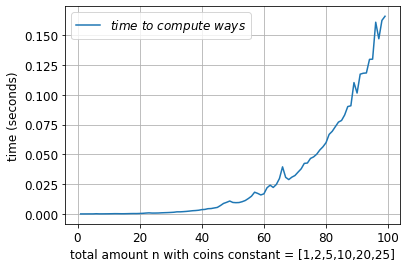

In [67]:
x = arange(1, 100, 1)
# On reconnait un O(n^2)
y = [ mean([tempo4(w) for i in range(10)]) for w in x]
figure(1)
plot(x, y,label=r'$time\ to\ compute\ ways$')
legend()
grid(True)
ax=gca()
ax.set_xlabel('total amount n with coins constant = [1,2,5,10,20,25]')
ax.set_ylabel('time (seconds)')
show()

In [2]:
# Version memoisée
def memways(n, k, coins):
    if n<0:
        return 0
    if (n, k) in calculated:
        return calculated[n,k]
    if k == 0:
        v = 1
    else:
        v = memways(n-coins[k], k, coins) + memways(n, k-1, coins)
    calculated[n,k] = v
    return v

In [6]:
calculated = {}
memways(100,4, [1, 2, 5, 20, 50])

1441